## seaborn_intro

In [2]:
import ast 
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  # This converts the string representation to an actual list

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

## import seaborn


In [4]:
import seaborn as sns

### customizing our chart from `19_exercise_skill_pay_analysis`

In [5]:
# Filter for Data Analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Remove rows where 'salary_year_avg' is NaN
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

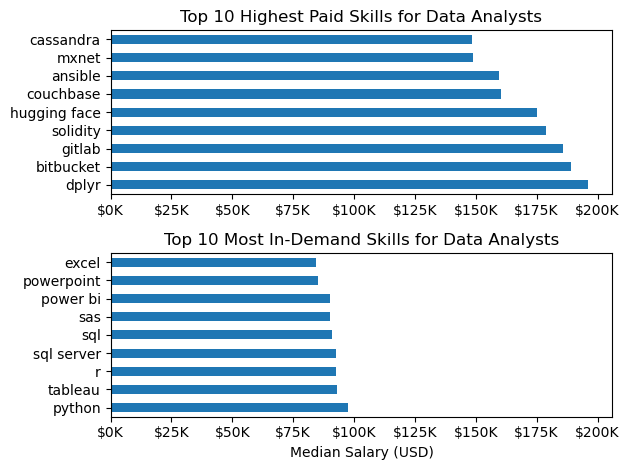

In [6]:
# Make each skill its own row
df_DA_US_exploded = df_DA_US.explode('job_skills')

# Now group works fine
df_DA_US_group = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

# Top 10 by pay
df_DA_top_pay = df_DA_US_group.sort_values(by='median', ascending=False).head(10)

# Top 10 by count, then sort by median salary
df_DA_skills = df_DA_US_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

# Plotting
fig, ax = plt.subplots(2,1)
# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[:-1].plot(kind='barh', y='median', ax=ax[0], legend=False) # [:-1] to exclude the last row which is "nan"
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[:-1].plot(kind='barh', y='median', ax=ax[1], legend=False) # [:-1] to exclude the last row which is "nan"
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()

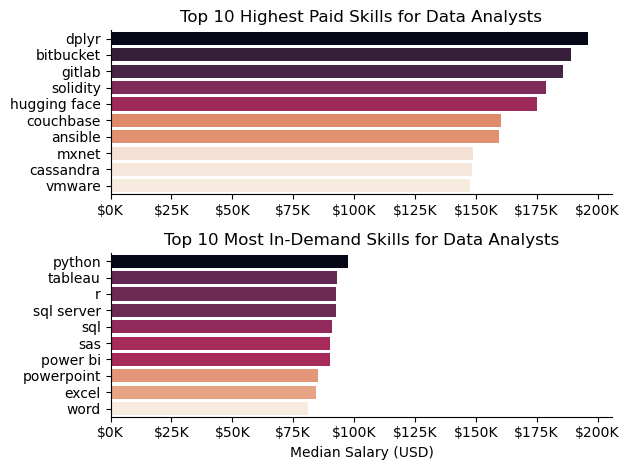

In [7]:
fig, ax = plt.subplots(2, 1)


sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='rocket_r') # _r to reverse the palette
ax[0].legend_.remove()

#df_DA_top_pay[:-1].plot(kind='barh', y='median', ax=ax[0], legend=False) # [:-1] to exclude the last row which is "nan"
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

###############################################################################################

sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, ax=ax[1], hue='median', palette='rocket_r') # _r to reverse the palette
ax[1].legend_.remove()

#df_DA_skills[:-1].plot(kind='barh', y='median', ax=ax[1], legend=False) # [:-1] to exclude the last row which is "nan"
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

fig.tight_layout()
sns.despine()
plt.show()

#What hue means in sns.barplot
#The hue parameter is used to split your data into sub-categories, each shown in a different color.
#It only makes sense when you have another categorical variable to group by.

### customizing our chart from `17_matplotlib_histogram`

In [8]:
df_DA_US= df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

Text(0, 0.5, 'Number of Jobs')

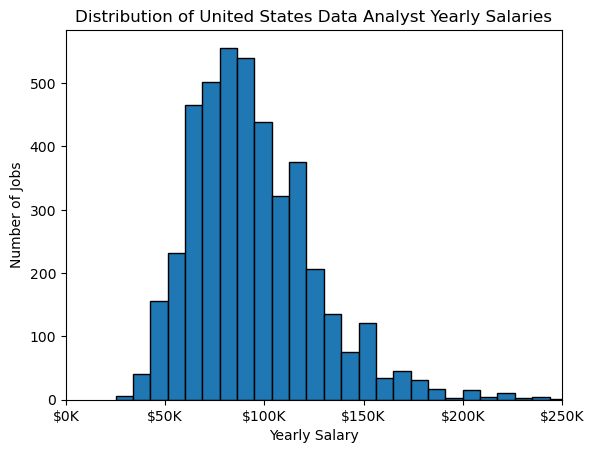

In [9]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca() # get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

C:\Users\go\AppData\Local\Temp\ipykernel_18092\3802206245.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_DA_US, x='salary_year_avg', palette= 'icefire', bins=40, edgecolor='black')


Text(0, 0.5, 'Number of Jobs')

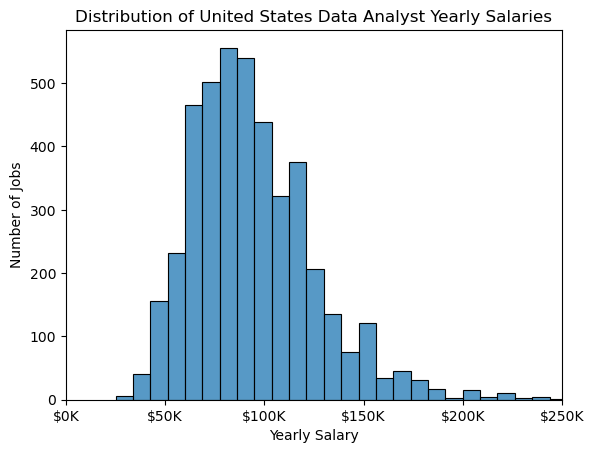

In [10]:
sns.histplot(data=df_DA_US, x='salary_year_avg', palette= 'icefire', bins=40, edgecolor='black')

#df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca() # get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

Text(9.444444444444445, 0.5, 'Density')

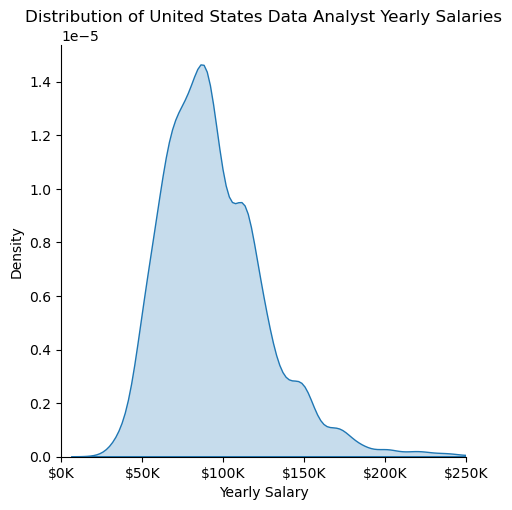

In [14]:
sns.displot(data=df_DA_US, x='salary_year_avg', kind='kde', fill=True)

#df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

ax = plt.gca() # get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Density')

### customizing our chart from `18_matplotlib_boxplot`

C:\Users\go\AppData\Local\Temp\ipykernel_18092\1105522638.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


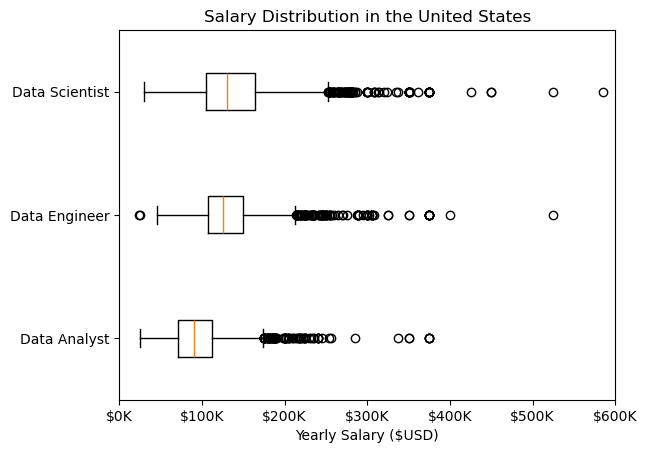

In [17]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter the data to appropriate job titles
df_US = df[ (df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short']== job_title]['salary_year_avg'] 
            for job_title in job_titles                                    
            ]

plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 600000)
ax = plt.gca() # get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()

## note

2. Using sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

Input:

You pass the whole DataFrame df_US.

x and y tell Seaborn which columns to use.

Seaborn automatically groups salaries (salary_year_avg) by job title.

Labels: Taken directly from the DataFrame column (job_title_short).

Pros:

Much easier and cleaner when data is in a tidy DataFrame.

Automatically handles grouping.

Works well with additional Seaborn features (hue, palettes, swarmplots, etc.).

Cons:

Slightly less control at the lowest level compared to raw matplotlib.

🔑 Key Difference

plt.boxplot → You prepare the data manually (job_list) and then pass it in.

sns.boxplot → You just pass the DataFrame, and Seaborn does the grouping automatically.

👉 Think of it like this:

plt.boxplot = "You must cook all the ingredients before serving."

sns.boxplot = "You just hand the chef (Seaborn) the raw ingredients (DataFrame), and it cooks & serves for you."

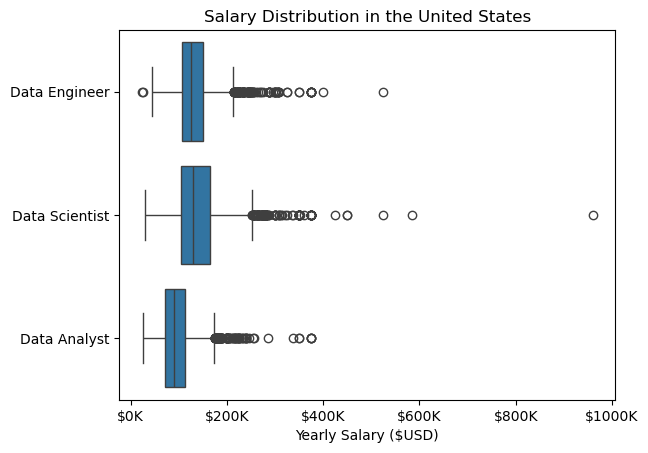

In [13]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
#plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca() # get current axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()